# 📘 Loss Functions(损失函数)

## 1 什么是损失函数？

损失函数(Loss Function)是衡量模型输出 $\hat{y}$ 与真实标签 $y$ 之间差距的函数。

它告诉我们模型当前的“错误”程度。训练的目标就是不断优化参数，**最小化损失函数**。

---

## 2 为什么损失函数很重要？

- 是模型学习的目标函数
- 决定了训练方向（通过反向传播）
- 不同任务使用不同损失（回归 vs 分类）

---

## 3 损失函数 vs 评估指标

| 概念         | 作用                    | 示例 |
|--------------|-------------------------|------|
| **Loss Function** | 模型训练时最小化目标      | MSE, Cross-Entropy |
| **Evaluation Metric** | 评估模型性能，不参与反向传播 | Accuracy, F1, ROC-AUC |

---

## 4 分类 vs 回归中使用的损失函数

| 类型     | 常用损失函数                        |
|----------|-------------------------------------|
| 回归     | MSE, MAE                            |
| 分类（二类） | Cross-Entropy (Log Loss), Hinge Loss |
| 多分类   | Categorical Cross-Entropy, Softmax Loss |

## 📚 本笔记将系统学习以下常见损失函数：

### 🟦 回归任务常用损失函数
- **MSE**（Mean Squared Error，均方误差）
- **MAE**（Mean Absolute Error，平均绝对误差）
- **Huber Loss**（对异常值更鲁棒）
- **Log-Cosh Loss**（平滑版本的 MAE）

### 🟩 二分类任务常用损失函数
- **Binary Cross-Entropy**（对数损失 / 对数似然）
- **Hinge Loss**（用于 SVM）
- **Focal Loss**（用于类别不平衡问题）

### 🟨 多分类任务常用损失函数
- **Categorical Cross-Entropy**
- **Sparse Categorical Cross-Entropy**
- **Kullback–Leibler Divergence**（KL 散度）


回归Loss Function


### 1. MSE（Mean Squared Error，均方误差）

---

**定义**：SSE 是所有预测值与真实值之间误差的平方之和，是回归模型衡量拟合误差的重要指标之一。

$$
\text{SSE} = \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$

**定义**：
MSE 衡量预测值与真实值的平方差的平均值，是最常见的回归损失函数之一。

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$


---

**定义**：RMSE（均方根误差）是 MSE 的平方根，用于衡量预测值与真实值之间的平均差距，单位与原始目标值一致。

$$
\text{RMSE} = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2 }
$$

---

## 三者共有特性：

- 对大误差非常敏感（误差平方项）
- 对异常值（outlier）不鲁棒
- 全部是可导函数（适合用于梯度下降）

---

## 区别提示：

| 函数 | 是否平均 | 单位是否一致 | 实际应用 |
|------|----------|---------------|-----------|
| SSE  | ❌ 否（总和） | ❌（平方单位） | 回归推导中目标函数 |
| MSE  | ✅ 是      | ❌（平方单位） | 最常用训练 loss |
| RMSE | ✅ 是      | ✅ 是（与 $y$ 一致） | 用于报告或解释结果 |


**应用**：
- 房价预测、温度预测等连续值回归任务
- 神经网络的回归输出层常使用 MSE

---

📌 一句话理解：
> “MSE 是最常用的回归损失，重惩罚大误差。”

### MSE 在分类任务中的缺点（梯度消失）

当 MSE 配合 sigmoid 输出用于分类任务时，在输出靠近 0 或 1 时，其导数 $\sigma'(z)$ 接近 0，导致整体梯度趋近于 0，学习几乎停止。

这就是所谓的**梯度消失问题**，如下图所示（蓝线是 sigmoid，紫线是其导数）：

📉 解决方法：使用 **Cross-Entropy** 替代 MSE 可避免该问题。

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# 示例
y_true = np.array([3.0, 5.0, 2.5])
y_pred = np.array([2.5, 5.5, 2.0])

def mse(y_true, y_pred):
    """
    计算均方误差（MSE）

    参数:
    y_true -- 真实值，形如 (n_samples,)
    y_pred -- 预测值，形如 (n_samples,)

    返回:
    MSE 值（float）
    """
    return np.mean((y_true - y_pred) ** 2)


def rmse(y_true, y_pred):
    """
    计算均方根误差（RMSE）

    参数:
    y_true -- 真实值，形如 (n_samples,)
    y_pred -- 预测值，形如 (n_samples,)

    返回:
    RMSE 值（float）
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

mse_hand = mse(y_true, y_pred)
print("MSE_hand =", mse_hand)

mse = mean_squared_error(y_true, y_pred)
print("MSE =", mse)



rmse_hand = rmse(y_true, y_pred)
print("RMSE_hand =", rmse_hand)
rmse = root_mean_squared_error(y_true, y_pred)
print("RMSE =", rmse)

MSE_hand = 0.25
MSE = 0.25
RMSE_hand = 0.5
RMSE = 0.5


### 2. MAE（Mean Absolute Error，平均绝对误差）

---

**定义**：MAE 衡量预测值与真实值之间绝对误差的平均值。相比 MSE，MAE 对于异常值更鲁棒（不会放大误差）。

$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} \left| y^{(i)} - \hat{y}^{(i)} \right|
$$

---

## 主要特性：

- ❌ 不放大大误差，对 outlier 更鲁棒  
- ❌ 不连续可导（在误差为 0 时不可导）  
- ✅ 同样用于回归问题，可度量平均误差的真实大小

---

## 与 MSE 的对比：

| 特性        | MSE                                | MAE                                |
|-------------|-------------------------------------|-------------------------------------|
| 异常值影响   | 高（放大误差） ✅                   | 低（线性响应） ✅                   |
| 可导性       | 连续可导 ✅                         | 在误差为 0 时不可导 ⚠️              |
| 优化难度     | 易于优化，常有解析解 ✅              | 对梯度下降不太友好，收敛较慢 ❌     |
| 解释性       | 单位为平方 ❌                        | 与目标值单位一致 ✅                  |

---

## 应用：

- 用于对异常值不敏感的回归任务
- 在业务指标更关注“平均偏离多少”而不是“偏离平方”的场景下

---

📌 一句话理解：

> “MAE 衡量误差的平均大小，鲁棒但不可导，适合对 outlier 敏感时使用。”


In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# 人工模拟数据
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# ✅ 手撕实现
def mae_manual(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# 🔧 sklearn 实现
mae_sklearn = mean_absolute_error(y_true, y_pred)

# 输出对比
print("Manual MAE:", mae_manual(y_true, y_pred))
print("Sklearn MAE:", mae_sklearn)


Manual MAE: 0.5
Sklearn MAE: 0.5


### 🔍 MSE vs. MAE 对比分析

| 属性 | MSE（均方误差） | MAE（平均绝对误差） |
|------|------------------|----------------------|
| **定义** | 平方差的平均值 | 绝对差的平均值 |
| **对误差的敏感度** | 对大误差更敏感，放大异常值影响（平方放大） | 各误差一视同仁，抗异常值能力更强 |
| **鲁棒性（Robust）** | 对离群点（outliers）敏感 | 对离群点更鲁棒 |
| **梯度特性** | 连续且可导，便于优化 | 在 $y = \hat{y}$ 处不可导，但可用次梯度处理 |
| **几何意义** | 最小化点到预测值的垂直距离的**平方和** | 最小化点到预测值的**绝对距离和** |
| **典型应用** | 回归训练阶段（如线性回归、神经网络），对精度敏感的任务 | 噪声较大数据、鲁棒回归、异常检测等任务 |

---

📌 **总结一句话：**

> **MSE** 放大大误差，更适合对精度要求高的场景；  
> **MAE** 更鲁棒，适用于含异常值或噪声较多的数据集。


### 3. Huber Loss（平滑绝对误差）

---

#### 📖 定义

Huber Loss 是一种结合了 MSE 与 MAE 优点的损失函数：

- 小误差时采用 **MSE**（平方损失）
- 大误差时采用 **MAE**（绝对值损失）

定义如下（$\delta$ 为阈值）：

$$
\mathcal{L}_\delta(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \leq \delta \\\\
\delta \cdot \left( |y - \hat{y}| - \frac{1}{2} \delta \right) & \text{otherwise}
\end{cases}
$$

---

#### ⚙️ 参数说明

- $\delta$：切换点，决定误差多大时从 MSE 切换为 MAE
  - 默认通常设为 $1.0$
  - 越小越鲁棒，越大越平滑

---

#### ✅ 特性总结

| 特性               | 描述                                   |
|--------------------|----------------------------------------|
| 对离群值鲁棒性     | ✅ 高                                   |
| 是否连续可导       | ✅ 是（在所有点处都可导）               |
| 是否带单位         | ✅ 与标签单位一致                      |
| 平滑程度可调       | ✅ 通过 $\delta$ 控制平滑/鲁棒性权衡     |

---

#### 📌 一句话理解：

> “Huber Loss 是一位懂得平衡的损失函数 —— 小错较真，大错包容。”


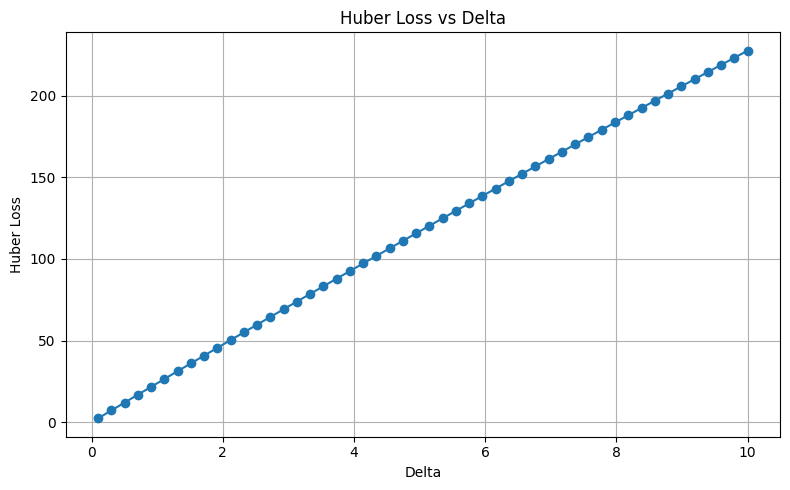

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def huber_loss(y_true, y_pred, delta=1.0):
    """
    实现 Huber Loss

    参数:
    y_true -- 真实值
    y_pred -- 预测值
    delta  -- 切换点，默认 1.0

    返回:
    平均 Huber Loss（float）
    """
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta

    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)

    return np.mean(np.where(is_small_error, squared_loss, linear_loss))


# 示例数据
y_true = np.array([1.0, 2.0, 3.0, 100.0])
y_pred = np.array([1.1, 1.9, 3.2, 4.0])

# 不同 delta 值下的 loss
deltas = np.linspace(0.1, 10, 50)
losses = [huber_loss(y_true, y_pred, delta=d) for d in deltas]

# 可视化
plt.figure(figsize=(8, 5))
plt.plot(deltas, losses, marker='o')
plt.title('Huber Loss vs Delta')
plt.xlabel('Delta')
plt.ylabel('Huber Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Log-Cosh Loss（对数双曲余弦损失）

---

#### 📖 定义

Log-Cosh Loss 是一种介于 **MSE** 与 **MAE** 之间的平滑损失函数：

- 当误差很小时，它近似于 $\frac{1}{2}(y - \hat{y})^2$（即 MSE）
- 当误差很大时，它近似于 $|y - \hat{y}|$（即 MAE）

定义如下：

$$
\mathcal{L}_{\text{logcosh}} = \sum_{i=1}^m \log \left( \cosh\left( y^{(i)} - \hat{y}^{(i)} \right) \right)
$$

其中：

- $\cosh(x) = \frac{e^x + e^{-x}}{2}$ 是双曲余弦函数
- $\log(\cosh(x))$ 在 $x \to 0$ 附近近似为 $\frac{x^2}{2}$，而 $x \to \infty$ 时近似为 $|x|$

---

#### ✅ 特性总结

| 特性             | 描述                                              |
|------------------|---------------------------------------------------|
| 对 outlier 鲁棒  | ✅（近似 MAE）                                     |
| 是否连续可导     | ✅（相比 MAE 更适合梯度下降）                     |
| 数值稳定性       | ✅（相比 Huber 更平滑，无需手动调 delta）         |
| 训练表现         | ✅ 回归任务中效果稳定，适用于含轻微噪声的数据      |

---

#### 📌 一句话理解：

> “Log-Cosh 是一个自动平衡 MSE 和 MAE 的平滑损失函数：小误差近似 MSE，大误差近似 MAE。”


In [8]:
import numpy as np

def log_cosh_loss(y_true, y_pred):
    """
    实现 log-cosh 损失函数

    参数:
    y_true -- 真实标签数组 (n,)
    y_pred -- 预测值数组 (n,)

    返回:
    平均 log-cosh 损失（float）
    """
    error = y_pred - y_true
    return np.mean(np.log(np.cosh(error)))  # 直接调用 numpy 的稳定实现

# 示例
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

loss = log_cosh_loss(y_true, y_pred)
print("Log-Cosh Loss =", loss)


Log-Cosh Loss = 0.1685024610998955


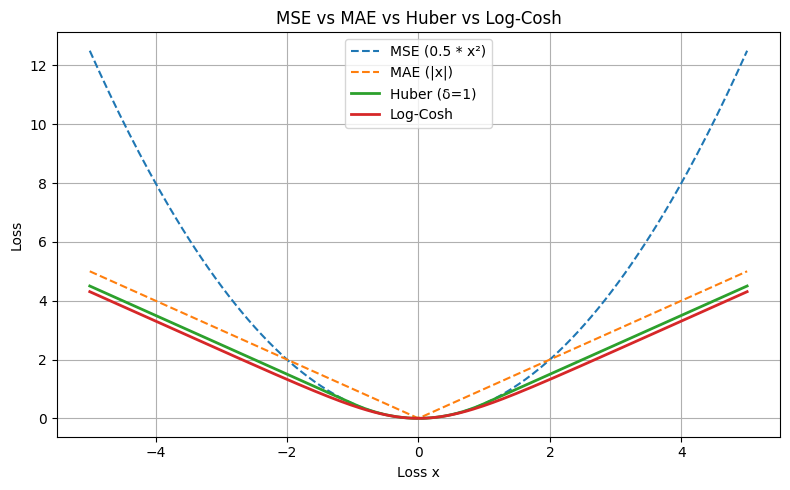

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 定义误差范围
x = np.linspace(-5, 5, 200)

# 计算不同损失函数的值
mse = 0.5 * x**2
mae = np.abs(x)
huber = np.where(np.abs(x) <= 1.0, 0.5 * x**2, 1.0 * (np.abs(x) - 0.5))
logcosh = np.log(np.cosh(x))

# 画图
plt.figure(figsize=(8, 5))
plt.plot(x, mse, label="MSE (0.5 * x²)", linestyle="--")
plt.plot(x, mae, label="MAE (|x|)", linestyle="--")
plt.plot(x, huber, label="Huber (δ=1)", linewidth=2)
plt.plot(x, logcosh, label="Log-Cosh", linewidth=2)
plt.title("MSE vs MAE vs Huber vs Log-Cosh")
plt.xlabel("Loss x")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
